In [1]:
import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi
X[:,0], X[:, 1] = np.cos(angles), np.sin(angles)
X += 0.28 * np.random.randn(m ,3)
X = Rotation.from_rotvec([np.pi /29, -np.pi /20, np.pi/4]).apply(X)
X += [0.2, 0, 0.2]

X

array([[-0.36044079, -1.29387867, -0.19289405],
       [-0.60386027,  0.4526088 , -0.31278085],
       [ 1.34681758,  0.11782937,  0.14274642],
       [ 0.62729385, -0.55727135,  0.42084942],
       [-0.59055876, -0.94958122,  0.06366505],
       [-0.1884097 , -0.60758249,  0.01146068],
       [-0.49592156, -1.18122089,  0.1738277 ],
       [ 0.28578766,  1.18265016,  0.68157246],
       [ 0.94193415, -0.90196631,  0.2361048 ],
       [ 1.45142206,  0.09472771,  0.78841168],
       [-1.17305512, -1.04624473, -0.08061183],
       [-0.78593812, -0.17837585, -0.49504508],
       [ 0.33134818,  0.90457383,  0.77742378],
       [-0.37841637, -0.9735486 , -0.15581829],
       [-0.34106331, -0.45488212, -0.07801703],
       [-0.41469568, -0.64449064,  0.31141758],
       [-0.42102357, -0.99131524, -0.13173236],
       [-0.01990797, -1.21886132,  0.05931754],
       [ 0.02315261, -0.93170356, -0.36853916],
       [-0.36939455, -0.90914025, -0.23034033],
       [ 0.64838106, -0.82143906,  0.653

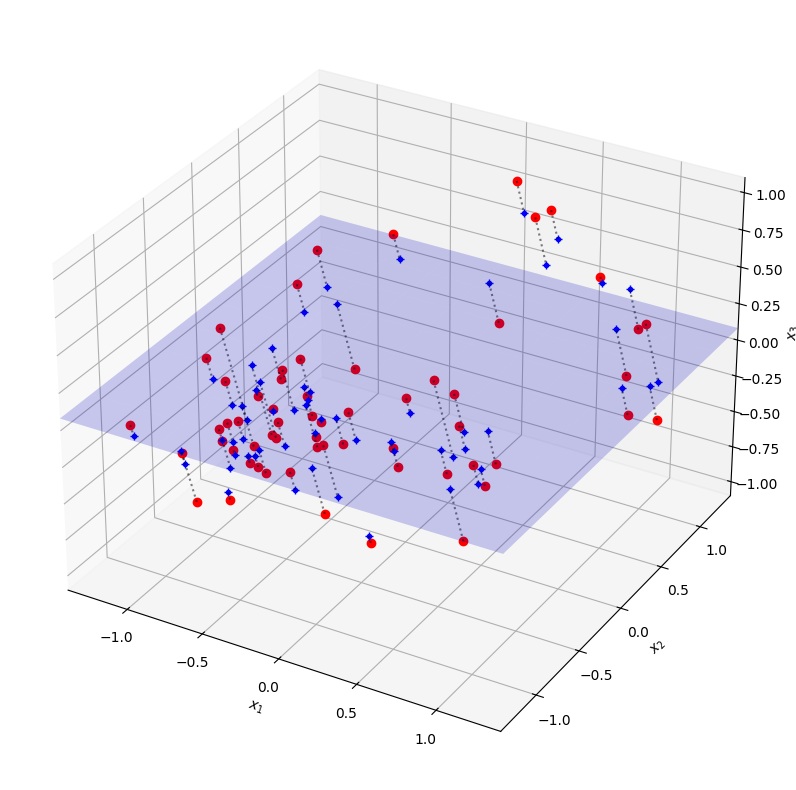

In [2]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X3D_inv = pca.inverse_transform(X2D)

axes= [-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]
X_above = X[X[:, 2] >= X3D_inv[:, 2]]
X_below = X[X[:,2] < X3D_inv[:, 2]]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.axis([-1.4, 1.4, -1.4, 1.4, -1.1, 1.1])

ax.plot(X[:, 0], X[:, 1], X[:, 2], 'ro')
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], 'b+')
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], 'b.')
ax.set_xlabel('$x_1$')
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$", rotation=0)

for i in range(m):
    ax.plot([X[i, 0], X3D_inv[i, 0]], 
            [X[i, 1], X3D_inv[i, 1]],
            [X[i, 2], X3D_inv[i, 2]], 'k:', alpha=0.5)

x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 10),
                     np.linspace(axes[2], axes[3], 10))

z = np.full_like(x1, pca.mean_[2])
ax.plot_surface(x1, x2, z, color='blue', alpha=0.2)

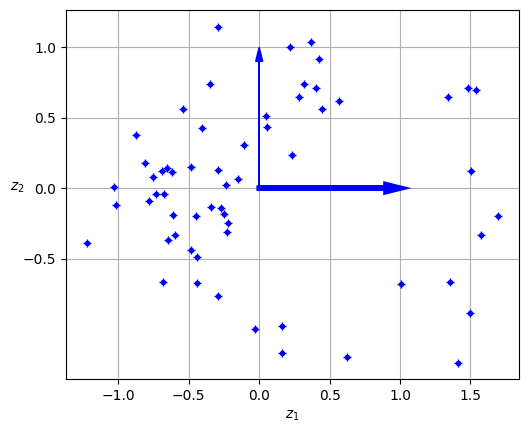

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect="equal")
ax.plot(X2D[:, 0], X2D[:, 1], "b+")
ax.plot(X2D[:, 0], X2D[:, 1], "b.")
ax.arrow(
    0,
    0,
    1,
    0,
    head_width=0.05,
    length_includes_head=True,
    head_length=0.1,
    fc="b",
    ec="b",
    linewidth=4,
)
ax.arrow(
    0,
    0,
    0,
    1,
    head_width=0.05,
    length_includes_head=True,
    head_length=0.1,
    fc="b",
    ec="b",
    linewidth=1,
)
ax.set_xlabel('$z_1$')
ax.set_yticks([-0.5, 0, 0.5, 1])
ax.set_ylabel('$z_2$', rotation=0)
ax.set_axisbelow(True)
ax.grid()

In [4]:
from sklearn.datasets import make_swiss_roll

x_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

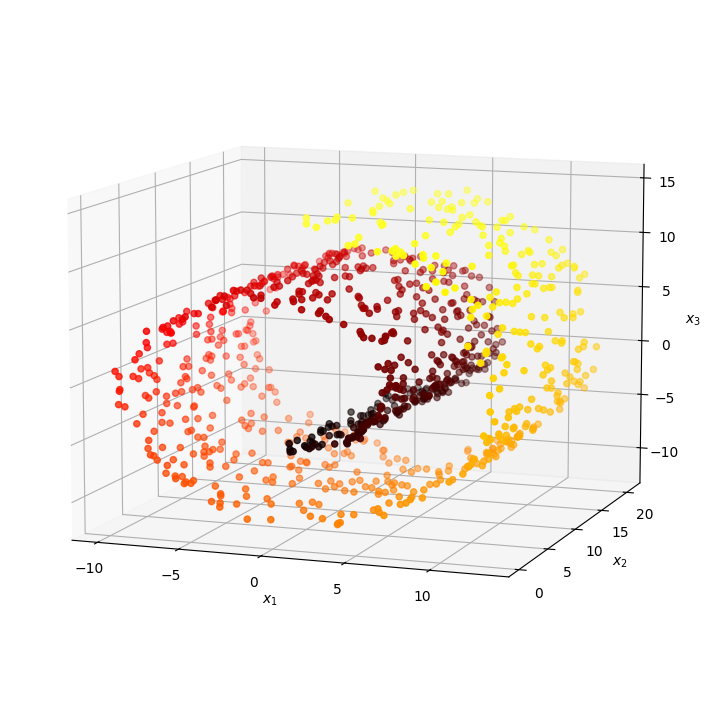

In [15]:
from matplotlib.colors import ListedColormap

darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256)))

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')
ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
ax.set_xlabel('$x_1$', rotation=0)
ax.set_ylabel('$x_2$', rotation=0)
ax.set_zlabel('$x_3$', rotation=0)

ax.scatter(x_swiss[:, 0], x_swiss[:, 1], x_swiss[:, 2], c=t, cmap=darker_hot)
ax.view_init(10, -70)
plt.show()